In [1]:
import torch
from torchvision import models
from pytorchvis.visualize_layers import VisualizeLayers

In [2]:
# load the Pytorch model
model = models.alexnet(pretrained=True)
print (model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [3]:
# create an object of VisualizeLayers and initialize it with the model and 
# the layers whose output you want to visualize
vis = VisualizeLayers(model,layers='conv')
# load the input
x = torch.randn([1,3,224,224])
# pass the input and get the output
output = model(x)
# get the intermediate layers output which was passed during initialization
interm_output = vis.get_interm_output()

features_container_Sequential
	 features.0_conv_Conv2d
	 features.1_activation_ReLU
	 features.2_pooling_MaxPool2d
	 features.3_conv_Conv2d
	 features.4_activation_ReLU
	 features.5_pooling_MaxPool2d
	 features.6_conv_Conv2d
	 features.7_activation_ReLU
	 features.8_conv_Conv2d
	 features.9_activation_ReLU
	 features.10_conv_Conv2d
	 features.11_activation_ReLU
	 features.12_pooling_MaxPool2d
avgpool_pooling_AdaptiveAvgPool2d
classifier_container_Sequential
	 classifier.0_dropout_Dropout
	 classifier.1_linear_Linear
	 classifier.2_activation_ReLU
	 classifier.3_dropout_Dropout
	 classifier.4_linear_Linear
	 classifier.5_activation_ReLU
	 classifier.6_linear_Linear


In [4]:
# plot the featuremap of the layer which you want, to see what are the layers
# saved simply call vis.get_saved_layer_names
output_layers=vis.get_saved_layer_names()
output_layers

['features.0_conv_Conv2d',
 'features.3_conv_Conv2d',
 'features.6_conv_Conv2d',
 'features.8_conv_Conv2d',
 'features.10_conv_Conv2d']

Number of output maps: 64


C:\Users\uid38717\AppData\Local\Continuum\Anaconda3\envs\pytorch_env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

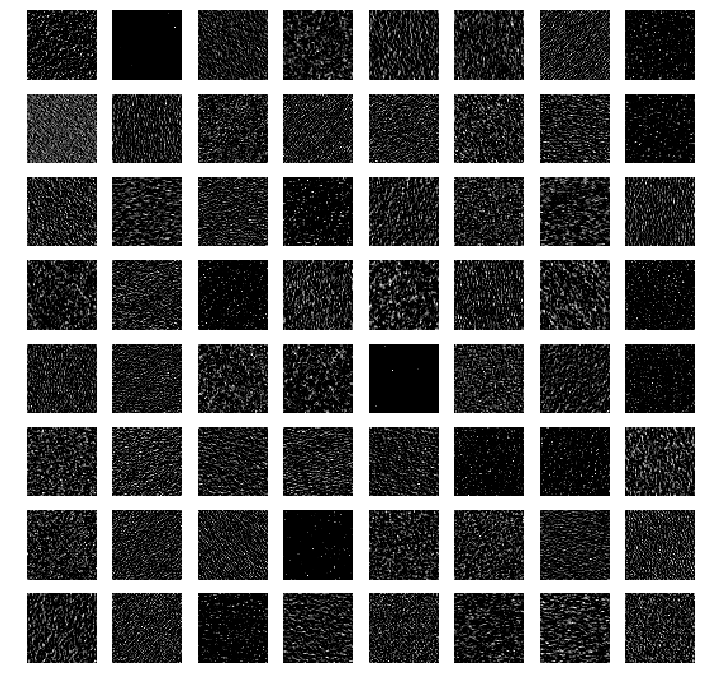

In [5]:
vis.plot_featuremaps(interm_output['features.0_conv_Conv2d'],name='fmaps',color_map='gray',savefig=False)


Number of output maps: 256


<Figure size 432x288 with 0 Axes>

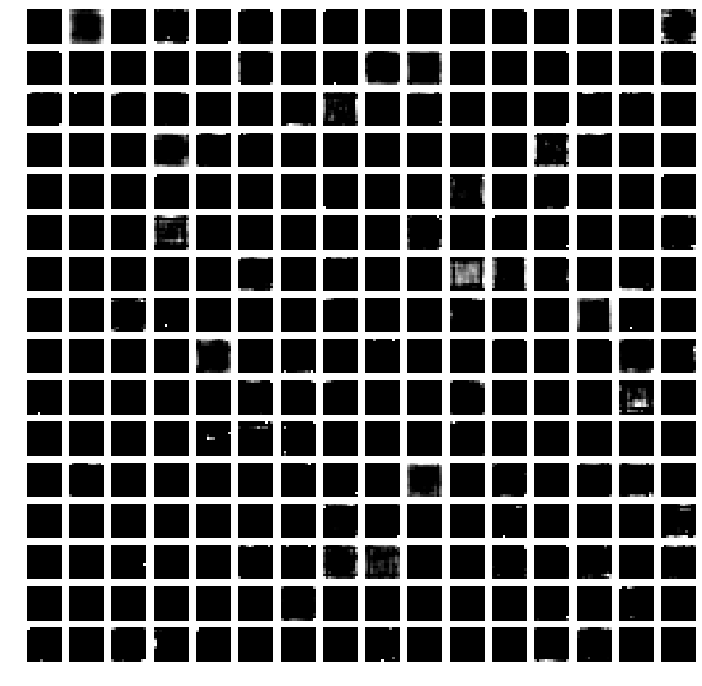

In [6]:
# to plot the intermediate 
vis.plot_featuremaps(interm_output[output_layers[-1]],name='fmaps',color_map='gray',savefig=False)